# Hierarchical clustering using IRIS dataset 

In [11]:
import numpy as np
import sklearn
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv("iris.data", sep=',')
df.columns = ['Index','Sepal length', 'Sepal width', 'Petal length', 'Petal Width'] 
display(df)
data = df.to_numpy()
data.shape

,Index,Sepal length,Sepal width,Petal length,Petal Width
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


(149, 5)

## Elbow Method

In [3]:
Sum_of_squared_distances = []
dt = data[:,0:4]

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dt)
    Sum_of_squared_distances.append(km.inertia_)

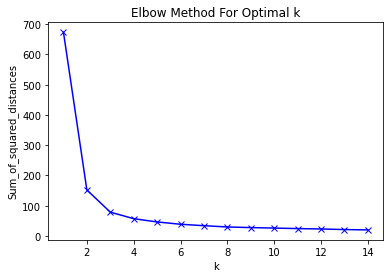

In [4]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Single Linkage

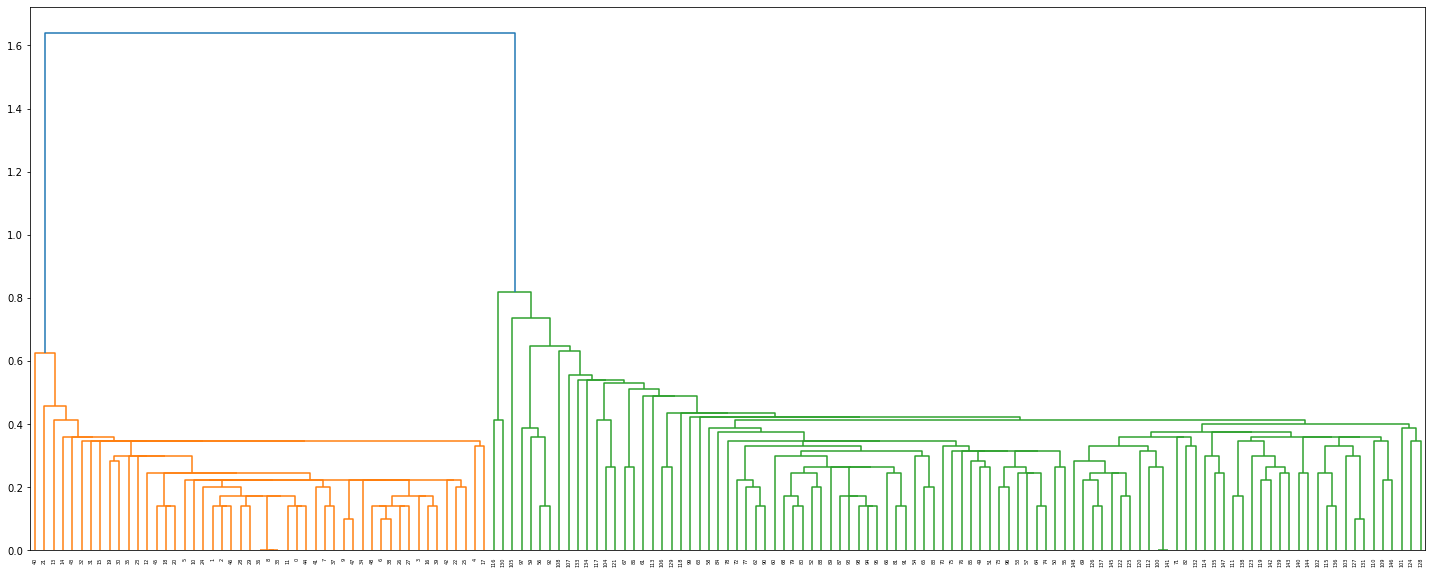

In [5]:
X = linkage(dt, 'single')
fig = plt.figure(figsize=(25, 10))
dn1 = dendrogram(X)
plt.show()

### Average Linkage

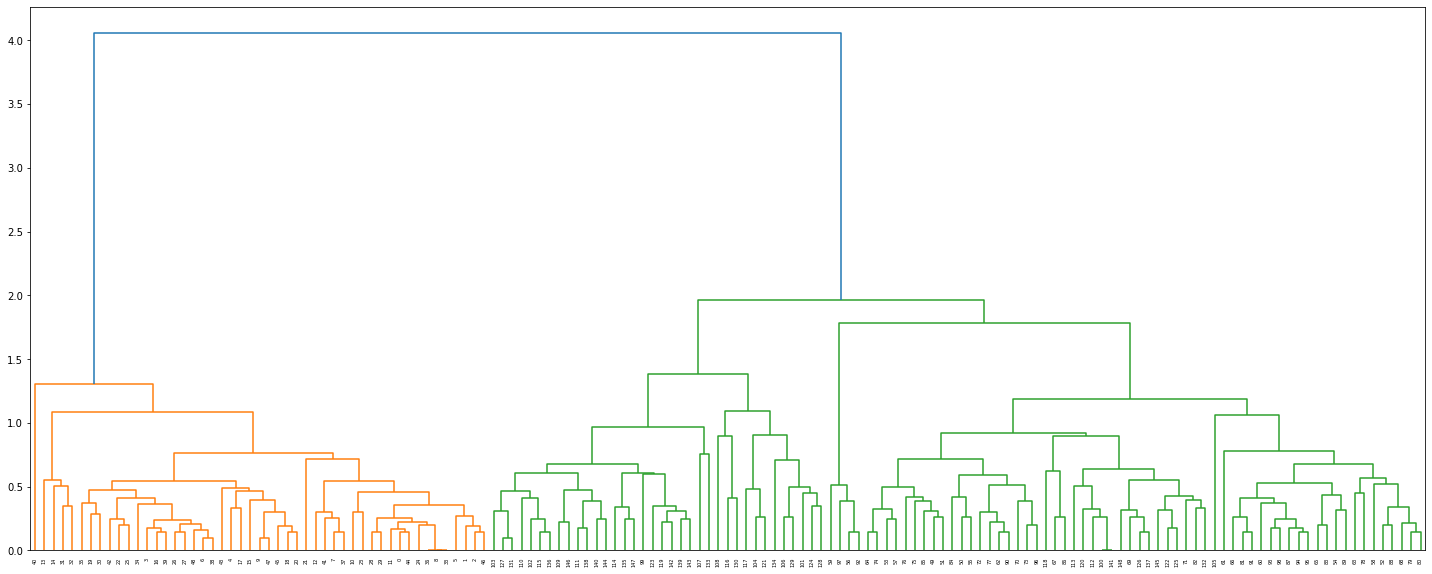

In [6]:
Y = linkage(dt, 'average')
fig = plt.figure(figsize=(25, 10))
dn2 = dendrogram(Y)
plt.show()

### Evaluate Dendogram

In [7]:
cp1, coph_dists = cophenet(X, pdist(dt))
cp2, coph_dists = cophenet(Y, pdist(dt))

print(cp1)
print(cp2)

0.8628760740152926
0.8761327937004479


### Truncate Dendogram

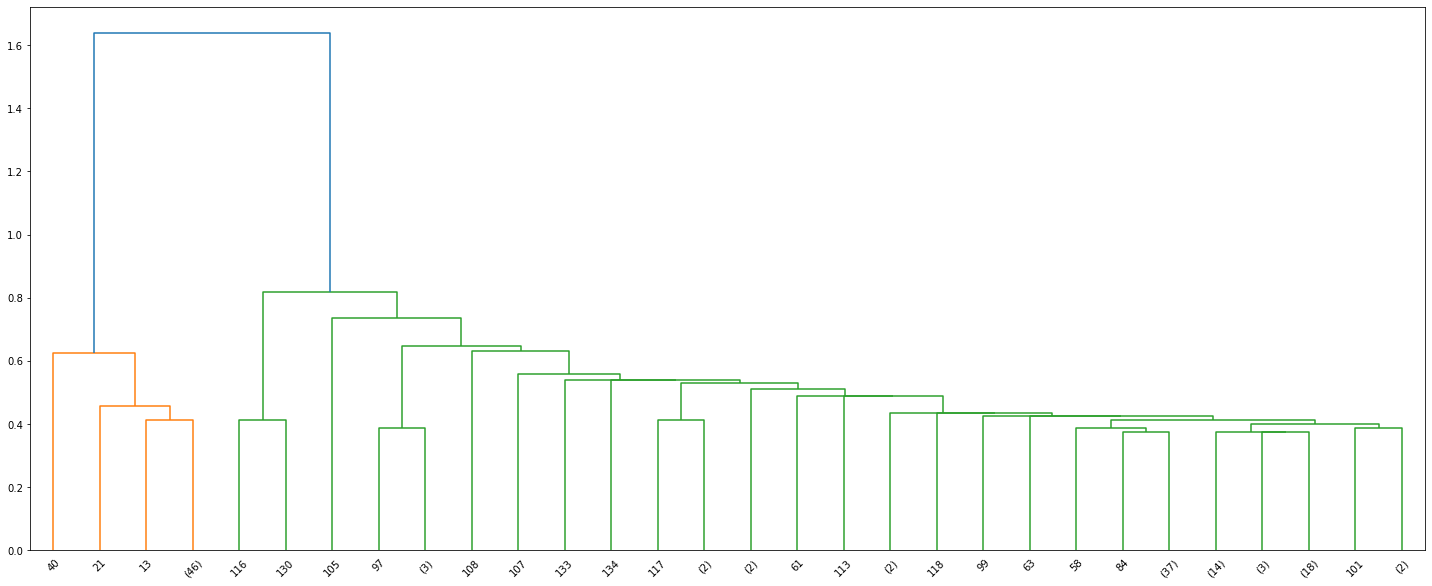

In [8]:
fig = plt.figure(figsize=(25, 10))
t_dn1 = dendrogram(X, truncate_mode='lastp')
plt.show()

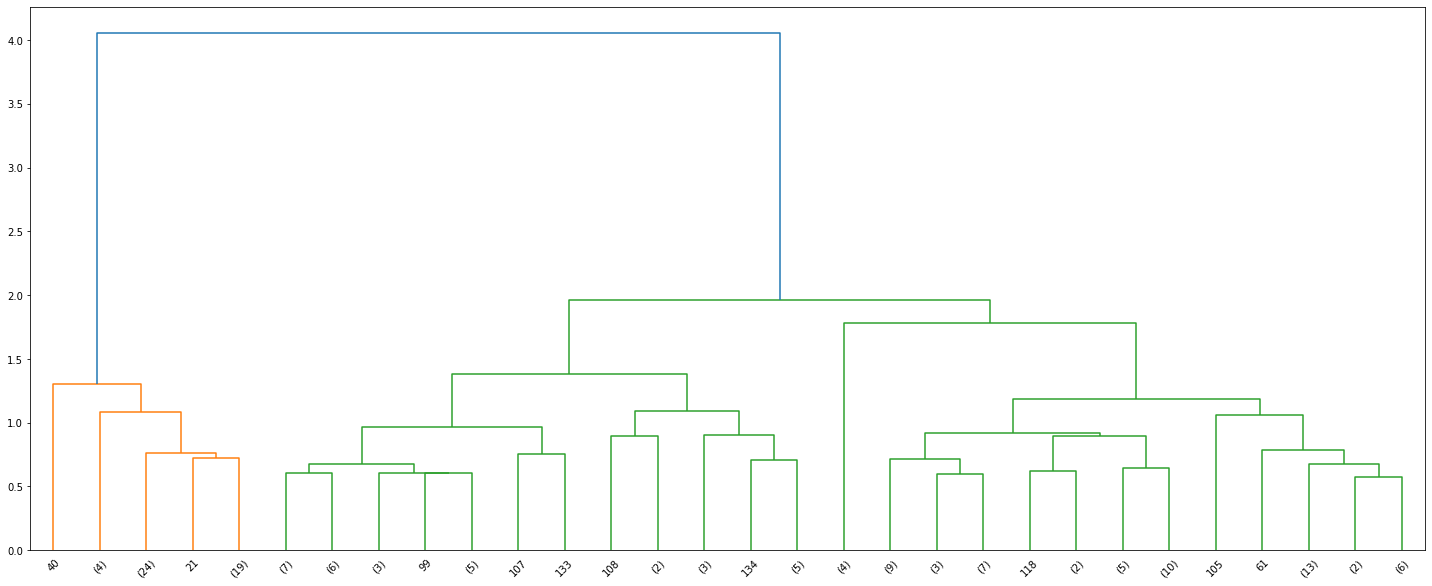

In [9]:
fig = plt.figure(figsize=(25, 10))
t_dn2 = dendrogram(Y, truncate_mode='lastp')
plt.show()

In [34]:
true_label = [1]*50 + [2]*50 + [3]*50

In [38]:
predicted_label_single = fcluster(X, 3, criterion='maxclust')
predicted_label_single

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [39]:
predicted_label_avg = fcluster(Y, 3, criterion='maxclust')
predicted_label_avg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)